# Reinforcement Learning in Finite MDPs

In [0]:
!git clone https://github.com/rlgammazero/mvarl_hands_on.git > /dev/null 2>&1

## MDPs

In [0]:
import sys
sys.path.insert(0, './mvarl_hands_on/utils')
import numpy as np
from scipy.special import softmax # for SARSA
import matplotlib.pyplot as plt
import json
import math
from cliffwalk import CliffWalk

Setting up the environment

In [16]:
env = CliffWalk(proba_succ=0.98)

####################################################################################
# You probably want to test smaller enviroments before
# env = ToyEnv1(gamma=0.95)
####################################################################################

# Useful attributes
print("Set of states:", env.states)
print("Set of actions:", env.actions)
print("Number of states: ", env.Ns)
print("Number of actions: ", env.Na)
print("P has shape: ", env.P.shape)  # P[s, a, s'] = env.P[s, a, s']
print("discount factor: ", env.gamma)
print("proba 36 action 1 state 36",env.P[36,1,36] )
print("")

# Usefult methods
state = env.reset() # get initial state
print("initial state: ", state)
print("reward at (s=1, a=3,s'=2): ", env.reward_func(1,3,2))
print("")

# A random policy
policy = np.random.randint(env.Na, size = (env.Ns,))
print("random policy = ", policy, policy[36])

# Interacting with the environment
print("(s, a, s', r):")
for time in range(4):
    action = policy[state]
    next_state, reward, done, info = env.step(action)
    print(state, action, next_state, reward)
    if done:
        break
    state = next_state
print("")

Set of states: range(0, 48)
Set of actions: [0, 1, 2, 3]
Number of states:  48
Number of actions:  4
P has shape:  (48, 4, 48)
discount factor:  0.99
proba 36 action 1 state 36 0.9866666666666667

initial state:  36
reward at (s=1, a=3,s'=2):  -2.0

random policy =  [0 2 3 3 0 2 0 1 3 3 2 0 1 2 2 0 2 2 3 1 1 1 0 0 0 3 1 3 3 2 3 2 3 1 3 2 2
 3 1 3 0 0 2 3 2 2 3 1] 2
(s, a, s', r):
36 2 36 -2.0
36 2 36 -2.0
36 2 36 -2.0
36 2 36 -2.0



## Question 1: Value iteration
1. Write a function applying the optimal Bellman operator on a provided Q function: $Q_1 = LQ_0, \; Q_0\in \mathbb{R}^{S\times A}$
2. Write a function implementing Value Iteration (VI) with $\infty$-norm stopping condition (reuse function implemented in 1)
3. Evaluate the convergence of your estimate, i.e., plot the value $\|V_n - V^\star\|_{\infty}$

In [0]:
# --------------
# Point 1
# --------------
def bellman_operator(Q0, Ns, Na, R, P):
    # TODO
    Q1= np.zeros((Ns, Na))
    greedy_policy=np.zeros(Ns)
    for i in range(Ns):
      for j in range(Na):
        S=0
        for l in range(Ns):
          S= S+ P[i, j,l]*max(Q0[l,:])
        Q1[i,j]= R[i,j]+env.gamma*S
    greedy_policy= np.argmax(Q1,axis=1)
    return Q1, greedy_policy

In [0]:
# --------------
# Point 2
# --------------
def value_iteration(Q0, env, epsilon=1e-5):
    # TODO (feel free to change the return argument)
    Q_history= [Q0]
    r_max= np.max(env.R)
    K=int(np.log(r_max/epsilon)/np.log(1/env.gamma))
    Q1=Q0
    for i in range(K):
      (Q1, greedy_policy)=  bellman_operator(Q1, env.Ns, env.Na,env.R, env.P)
      Q_history.append(Q1)
    return(Q1, greedy_policy, Q_history)

Text(0.5, 1.0, 'Q-learning: Convergence of Q')

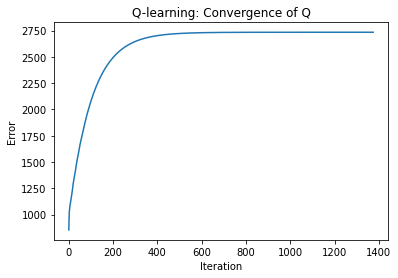

In [19]:
# --------------
# Point 3
# --------------
with open("./mvarl_hands_on/data/Q_opts.json", "r") as fp:
    Qopts = json.load(fp)
Qstar = Qopts["{}_{}".format(type(env).__name__,env.gamma)]
norm_values=[]
Q0= np.random.rand(env.Ns,env.Na)
Q, greedy_policy, Q_history = value_iteration(Q0, env,epsilon=1e-5 )
norm_values=np.zeros(len(Q_history))
for i in range(len(Q_history)):
  norm_values[i]= np.linalg.norm(Q_history[i]-Qstar)
  
# TODO

plt.plot(norm_values)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title("Q-learning: Convergence of Q")

In [20]:
state = env.reset()
env.render()
for i in range(50):
    action = greedy_policy[state]
    state, reward, done, _ = env.step(action)
    env.render()

+-----------------------+
| : : : : : : : : : : : |
| : : : : : : : : : : : |
| : : : : : : : : : : : |
|S:x:x:x:x:x:x:x:x:x:x:G|
+-----------------------+

+-----------------------+
| : : : : : : : : : : : |
| : : : : : : : : : : : |
|_: : : : : : : : : : : |
|S:x:x:x:x:x:x:x:x:x:x:G|
+-----------------------+
  (up)
+-----------------------+
| : : : : : : : : : : : |
|_: : : : : : : : : : : |
| : : : : : : : : : : : |
|S:x:x:x:x:x:x:x:x:x:x:G|
+-----------------------+
  (right)
+-----------------------+
| : : : : : : : : : : : |
| :_: : : : : : : : : : |
| : : : : : : : : : : : |
|S:x:x:x:x:x:x:x:x:x:x:G|
+-----------------------+
  (right)
+-----------------------+
| : : : : : : : : : : : |
| : :_: : : : : : : : : |
| : : : : : : : : : : : |
|S:x:x:x:x:x:x:x:x:x:x:G|
+-----------------------+
  (right)
+-----------------------+
| : : : : : : : : : : : |
| : : :_: : : : : : : : |
| : : : : : : : : : : : |
|S:x:x:x:x:x:x:x:x:x:x:G|
+-----------------------+
  (right)
+---------------

## Question 2: Q learning
Q learning is a model-free algorithm for estimating the optimal Q-function online.
It is an off-policy algorithm since the samples are collected with a policy that is (potentially) not the one associated to the estimated Q-function.

1. Implement Q learning with $\epsilon$-greedy exploration.
  - Plot the error in Q-functions over iterations
  - Plot the cumulative sum of rewards

optimal policy:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 3
 3 3 3 3 3 3 3 3 3 0 0]
est policy: [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 3
 3 3 3 3 3 3 3 3 3 0 1]
+-----------------------+
| : : : : : : : : : : : |
| : : : : : : : : : : : |
| : : : : : : : : : : : |
|S:x:x:x:x:x:x:x:x:x:x:G|
+-----------------------+

+-----------------------+
| : : : : : : : : : : : |
| : : : : : : : : : : : |
|_: : : : : : : : : : : |
|S:x:x:x:x:x:x:x:x:x:x:G|
+-----------------------+
  (up)
+-----------------------+
| : : : : : : : : : : : |
| : : : : : : : : : : : |
| :_: : : : : : : : : : |
|S:x:x:x:x:x:x:x:x:x:x:G|
+-----------------------+
  (right)
+-----------------------+
| : : : : : : : : : : : |
| : : : : : : : : : : : |
| : :_: : : : : : : : : |
|S:x:x:x:x:x:x:x:x:x:x:G|
+-----------------------+
  (right)
+-----------------------+
| : : : : : : : : : : : |
| : : : : : : : : : : : |
| : : :_: : : : : : : : |
|S:x:x:x:x:x:x:x:

Text(0.5, 1.0, 'Q-learning: Convergence of Q')

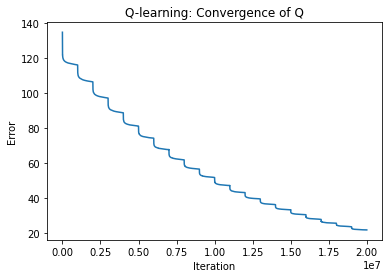

In [21]:
# ---------------------------
# Q-Learning
# ---------------------------
# suggested interface
# you can change it!
# --------------
# Point 1
# --------------
# Number of Q learning steps
max_steps = int(1e6)  
# max_steps = 10
state = env.reset()
Q0 = np.zeros((env.Ns, env.Na))
# Use the previous code to verify the correctness of q learning
Q_opt, pi_opt, Q_history = value_iteration(Q0, env, epsilon=1e-8)
Q=Q0
eps= 0.1


# main algorithmic loop
norm_values = []
for i in range(20):
  N = np.zeros((env.Ns, env.Na))
  t = 0
  while t < max_steps:
      #print(t)
      r= np.random.rand(1)
      if r<=eps :
        action= np.argmax(Q[state])
      else:
        action= np.random.choice(env.actions)
      N[state,action]+=1
      observation, reward, done, info = env.step(action)
      norm_values.append(np.abs(Q - Q_opt).mean())
      
      # todo do something
      t = t + 1
      delta= reward + env.gamma* np.max(Q[observation])- Q[state,action]
      Q[state,action]+= delta/N[state,action]
      state= observation

print("optimal policy: ", pi_opt)
greedy_policy = np.argmax(Q, axis=1)
print("est policy:", greedy_policy)
state = env.reset()
env.render()
for i in range(50):
    action = greedy_policy[state]
    state, reward, done, _ = env.step(action)
    env.render()

plt.plot(norm_values)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title("Q-learning: Convergence of Q")

# how confident are you in the performance of the algorithm? maybe a single run is not enough